In [1]:
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import cv2

from matplotlib import pyplot as plt

In [2]:
def load(train_fn: str,
         test_fn: str):
    train_df = pd.read_csv(train_fn)
    test_df = pd.read_csv(test_fn)

    X_train = np.array([[int(x) for x in s.split(',')] for s in train_df['Image']])
    y_train = np.array([int(s) for s in train_df['Category']])

    X_test = np.array([[int(x) for x in s.split(',')] for s in test_df['Image']])

    return (X_train, y_train), X_test

def binarize_image(pixels):
    pixels = pixels.reshape(28, 28)
    blur = cv2.GaussianBlur(pixels.astype(np.float32), (3,3), 0)
    binary = cv2.threshold(blur.astype(np.uint8), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    kernel = np.ones(shape=(2,2), dtype=np.uint8)
    pixels = cv2.morphologyEx(binary.astype(np.float32), cv2.MORPH_OPEN, kernel, iterations=1)
    return pixels.reshape(28*28)

def show_random_images(h=5, w=5):
    idxs = np.random.randint(0, X_train.shape[0] - 1, size=w * h).tolist()
    plt.figure(figsize=(w, h))
    
    for i in range(h * w):
        plt.subplot(h, w, i+1)
        image = X_train[idxs[i]].reshape(28,28)
        plt.imshow(image, cmap='gray')
        plt.title(y_train[idxs[i]])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()

In [9]:
(X_train, y_train), X_test = load(
        train_fn='train.csv',
        test_fn='test.csv')
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [10]:
X_train = np.apply_along_axis(binarize_image, axis=1, arr=X_train)
X_test = np.apply_along_axis(binarize_image, axis=1, arr=X_test)

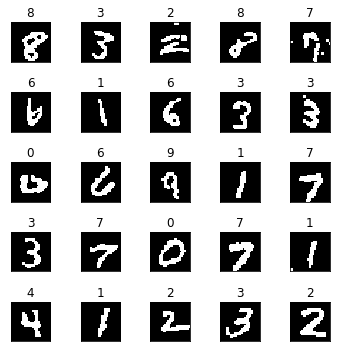

In [11]:
show_random_images()

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [16]:
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D

In [15]:
model = Sequential()

y_train_enc = to_categorical(y_train)
y_val_enc = to_categorical(y_val)

model = Sequential()
model.add(Conv2D())
model.add(Dense(5, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_enc, epochs=500, verbose=1, validation_data=(X_val, y_val_enc))


Train on 48000 samples, validate on 12000 samples
Epoch 1/500
48000/48000 [==============================] - 3s 54us/step - loss: 2.4059 - acc: 0.1119 - val_loss: 2.3035 - val_acc: 0.1118
Epoch 2/500
48000/48000 [==============================] - 2s 49us/step - loss: 2.3006 - acc: 0.1135 - val_loss: 2.3041 - val_acc: 0.1121
Epoch 3/500
48000/48000 [==============================] - 2s 49us/step - loss: 2.2435 - acc: 0.1457 - val_loss: 2.1870 - val_acc: 0.1643
Epoch 4/500
48000/48000 [==============================] - 2s 50us/step - loss: 2.1668 - acc: 0.1805 - val_loss: 2.1427 - val_acc: 0.1980
Epoch 5/500
48000/48000 [==============================] - 2s 50us/step - loss: 2.1222 - acc: 0.1849 - val_loss: 2.1087 - val_acc: 0.1854
Epoch 6/500
48000/48000 [==============================] - 2s 50us/step - loss: 2.1265 - acc: 0.1814 - val_loss: 2.1473 - val_acc: 0.1784
Epoch 7/500
48000/48000 [==============================] - 2s 51us/step - loss: 2.1145 - acc: 0.1824 - val_loss: 2.1553 - 

KeyboardInterrupt: 